In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mahotas as mh

In [3]:
DATA_DIR = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired'

In [4]:
z = 560
img = '000000_000000_000'+str(z)+'_000000.tif'

In [5]:
z_img = mh.imread(os.path.join(DATA_DIR,img))

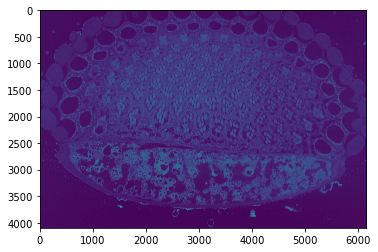

In [6]:
imshow(z_img)

In [7]:
z_img_cropped = z_img.copy()[1500:2000, 2500:4000]

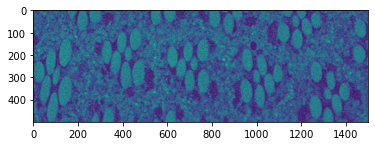

In [8]:
imshow(z_img_cropped)

In [9]:
# load ten images
slices = []
for z in range(550,560):
    img = '000000_000000_000'+str(z)+'_000000.tif'
    z_img = mh.imread(os.path.join(DATA_DIR,img))
    z_img_cropped = z_img[1500:2000, 2500:4000].astype(np.float)
    z_img_cropped /= z_img_cropped.max()
    z_img_cropped *= 255
    slices.append(z_img_cropped)

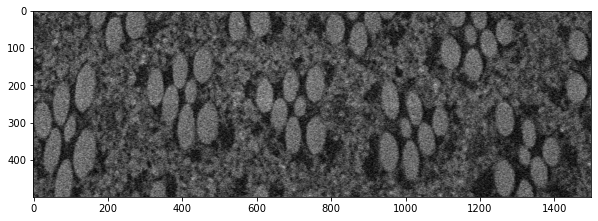

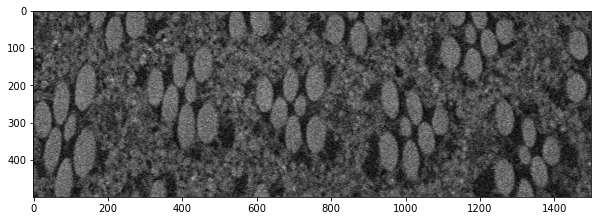

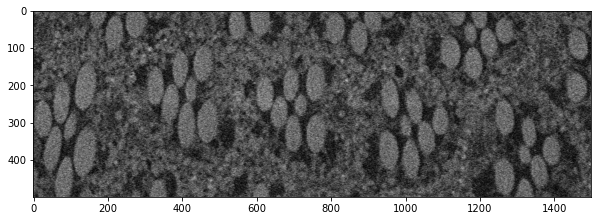

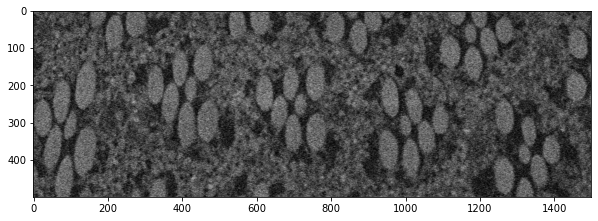

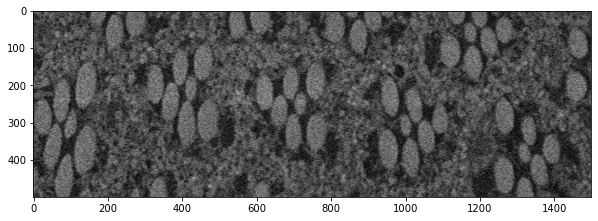

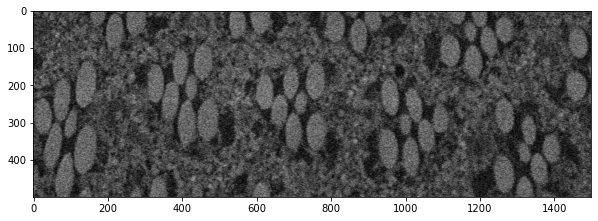

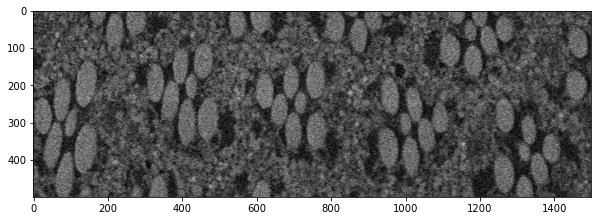

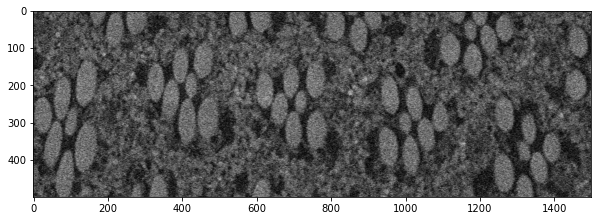

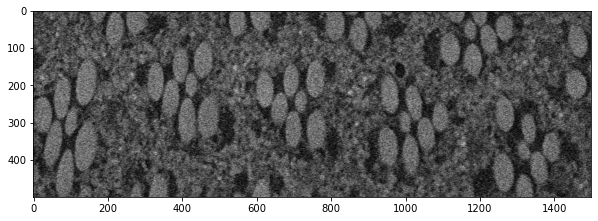

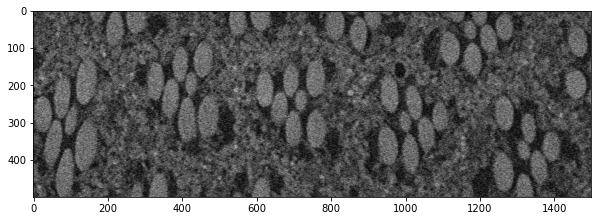

In [10]:
for s in slices:
    plt.figure(figsize=(10,10))
    imshow(s, cmap='gray')

In [11]:
z_img_cropped = z_img_cropped.astype(np.float)
z_img_cropped /= z_img_cropped.max()
z_img_cropped *= 255

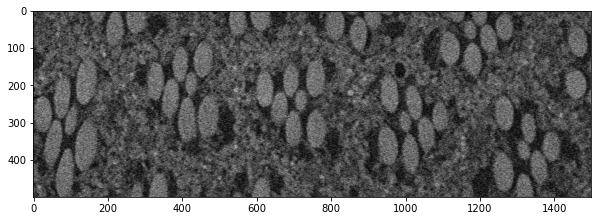

In [12]:
plt.figure(figsize=(10, 10))
imshow(z_img_cropped, cmap='gray')

In [13]:
z_img_cropped.max()

255.0

In [14]:
a = z_img_cropped.copy()

In [15]:
a = mh.gaussian_filter(a, sigma=3)

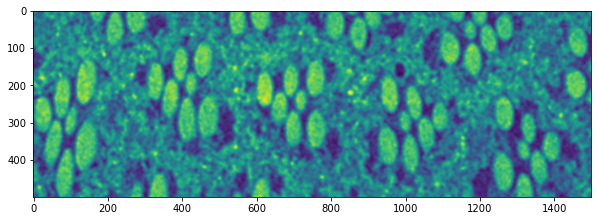

In [16]:
plt.figure(figsize=(10,10))
imshow(a)

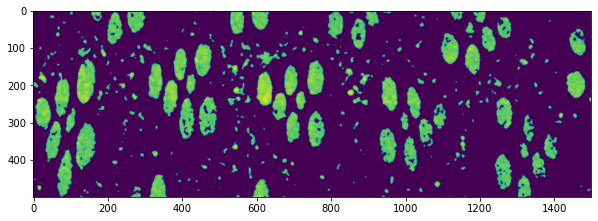

In [17]:
b = a.copy()
b[b<100] = 0 # TODO
plt.figure(figsize=(10, 10))
imshow(b)

In [18]:
labeled, number  = mh.label(b)

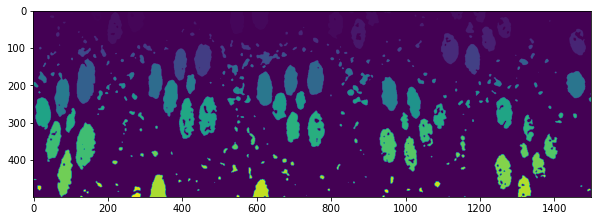

In [19]:
plt.figure(figsize=(10, 10))
imshow(labeled)

In [20]:
sizes = mh.labeled.labeled_size(labeled)
for i in range(len(sizes)):
    print("Size of region " + str(i) + " : " + str(sizes[i]))

Size of region 0 : 616463
Size of region 1 : 3
Size of region 2 : 65
Size of region 3 : 485
Size of region 4 : 2124
Size of region 5 : 12
Size of region 6 : 1987
Size of region 7 : 1854
Size of region 8 : 2207
Size of region 9 : 62
Size of region 10 : 1023
Size of region 11 : 106
Size of region 12 : 543
Size of region 13 : 718
Size of region 14 : 2417
Size of region 15 : 2
Size of region 16 : 22
Size of region 17 : 62
Size of region 18 : 34
Size of region 19 : 1419
Size of region 20 : 2086
Size of region 21 : 7
Size of region 22 : 14
Size of region 23 : 43
Size of region 24 : 28
Size of region 25 : 431
Size of region 26 : 78
Size of region 27 : 48
Size of region 28 : 1803
Size of region 29 : 7
Size of region 30 : 32
Size of region 31 : 3
Size of region 32 : 1891
Size of region 33 : 119
Size of region 34 : 16
Size of region 35 : 39
Size of region 36 : 86
Size of region 37 : 81
Size of region 38 : 2772
Size of region 39 : 55
Size of region 40 : 40
Size of region 41 : 76
Size of region 42

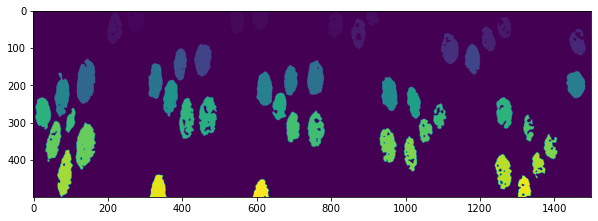

In [21]:
too_small = np.where(sizes < 1000)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
plt.figure(figsize=(10,10))
imshow(labeled_only_big)

In [22]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1

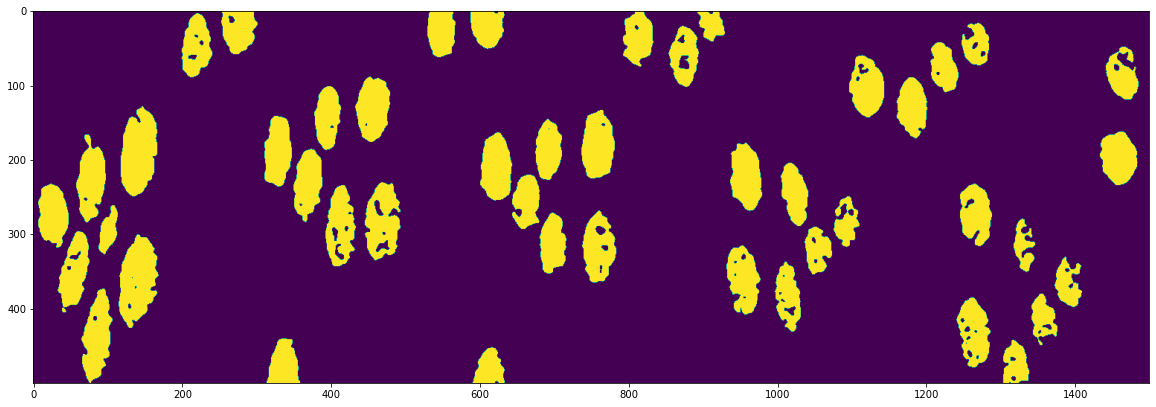

In [23]:
plt.figure(figsize=(20,20))
imshow(binary_mask)

In [24]:
binary_mask_closed = mh.morph.close(binary_mask)

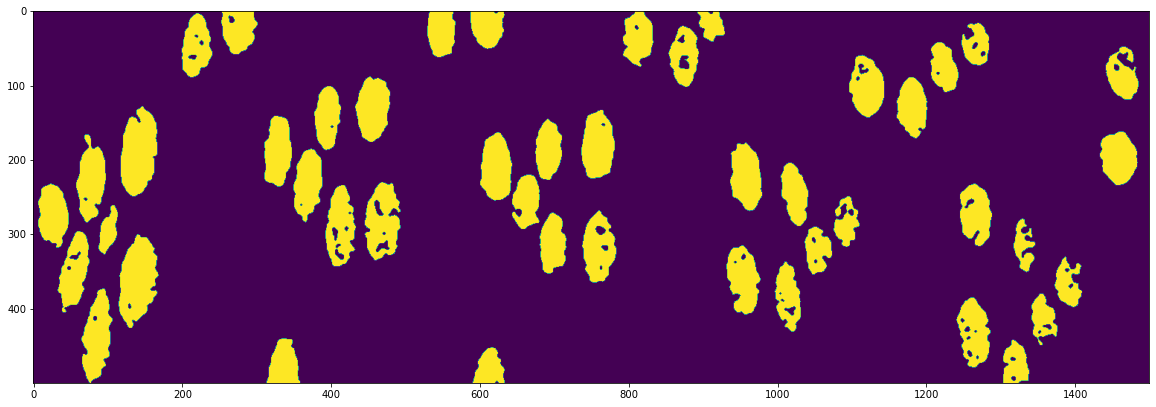

In [25]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [26]:
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

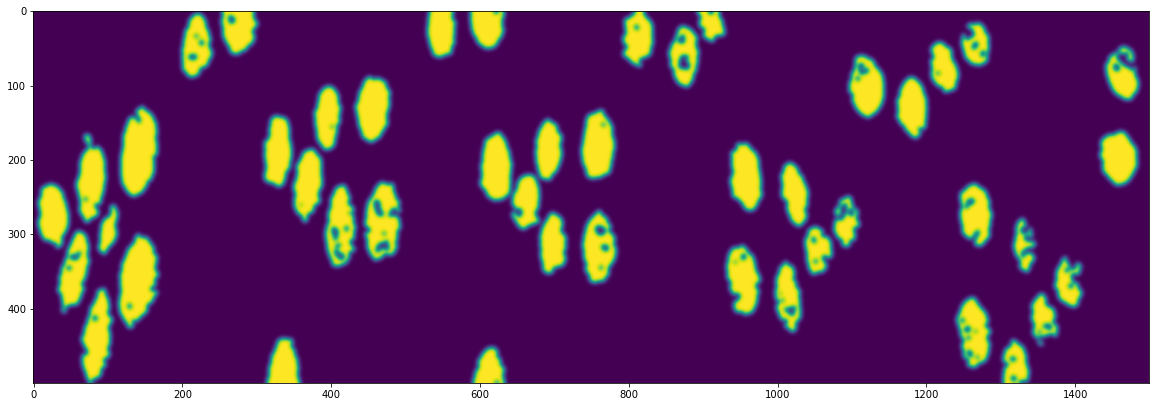

In [27]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed_filtered)

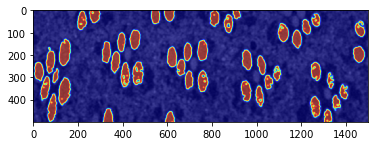

In [28]:
plt.figure()
plt.imshow(a, 'gray', interpolation='none')
plt.imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
plt.show()

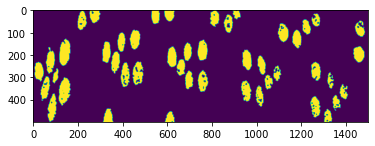

In [29]:
imshow(binary_mask)

In [30]:
binary_mask_open = binary_mask.copy()

In [31]:
binary_mask_closed_holes = mh.morph.close_holes(binary_mask_open)

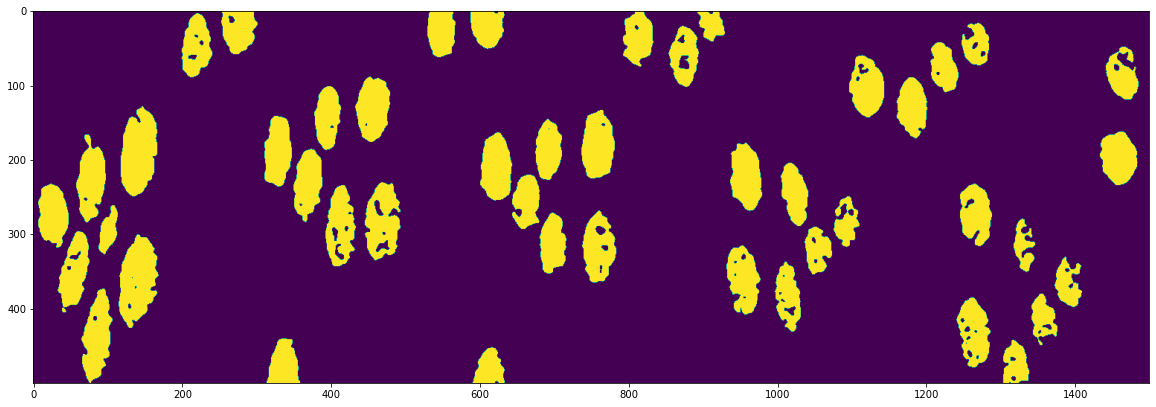

In [32]:
plt.figure(figsize=(20,20))
imshow(binary_mask_open)

In [33]:
binary_mask_closed = mh.morph.close(binary_mask_closed_holes)

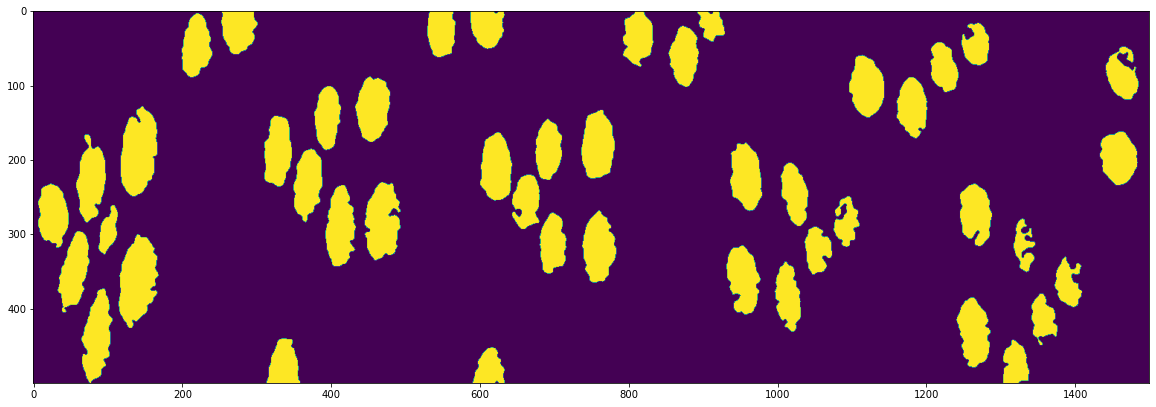

In [34]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [35]:
for i in range(4):
  binary_mask_closed = mh.morph.dilate(binary_mask_closed)

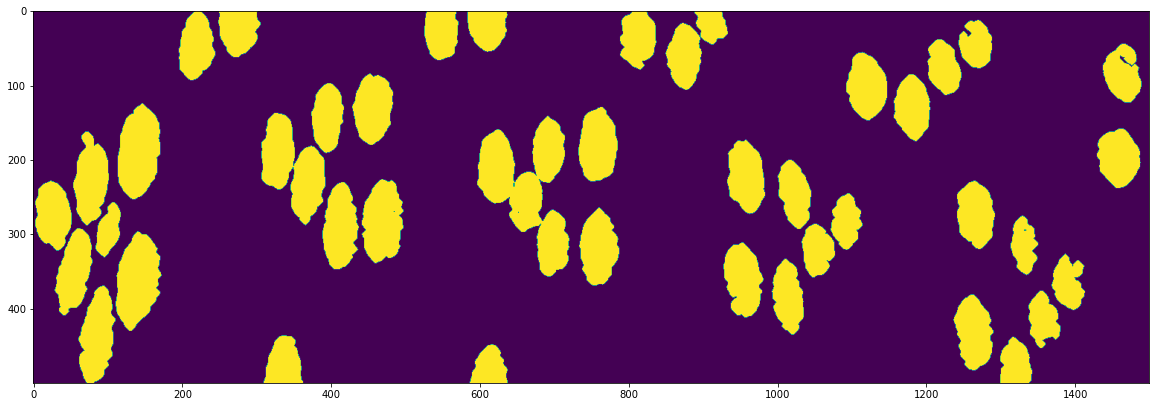

In [36]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [37]:
for i in range(4):
  binary_mask_closed = mh.morph.erode(binary_mask_closed)

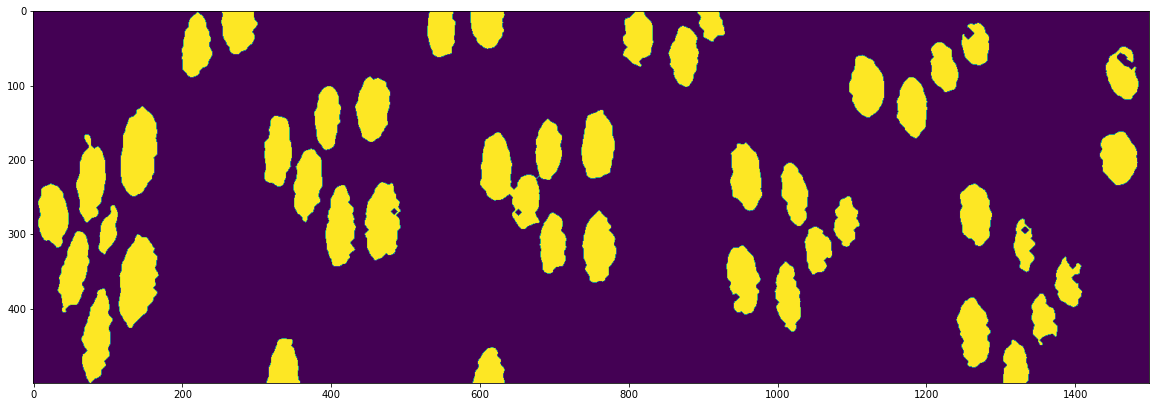

In [38]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [39]:
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

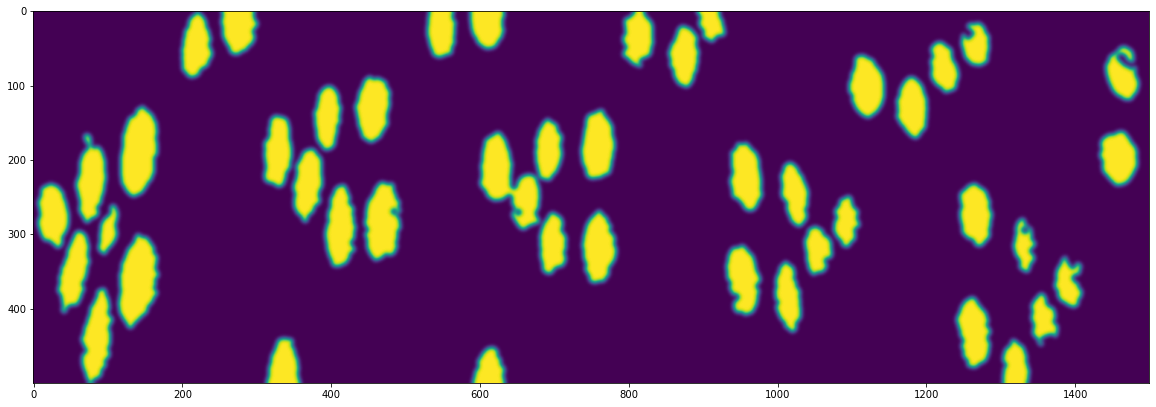

In [40]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed_filtered)

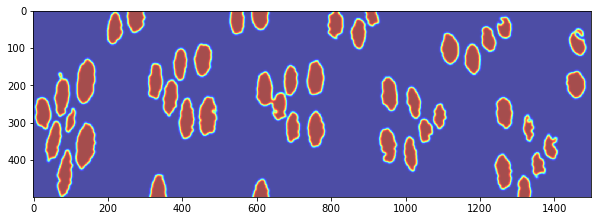

In [41]:
plt.figure(figsize(10,10))
plt.imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
plt.show()

In [42]:
binary_mask_closed_filtered.shape

(500, 1500)

In [43]:
binary_mask_closed_filtered

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
len(np.unique(binary_mask))

2